In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import vonmises, t

In [2]:
#os.chdir(r"D://simul2")

In [40]:
def run_simulations(pop_size=10000, init = 1, n_gen = 2000, self_ref = True, meta_mutation_rate = 0.1, nlevels = 5):
    sigmas_history = []
    sigmas = init*np.ones((nlevels,pop_size))
    sigmas = abs(sigmas)
    sigmas_history.append(sigmas.copy())
    for i in range(n_gen-1):
        if self_ref == True:
            sigmas[0,:] += np.random.normal(0,abs(sigmas[0,:]))
        else:
            sigmas[0,:] += np.random.normal(0,meta_mutation_rate)
        for j in range(1,nlevels):
            sigmas[j,:] += np.random.normal(0,abs(sigmas_history[-1][j-1,:]))
        sigmas = abs(sigmas)
        sigmas_history.append(sigmas.copy())
    #np.save('metasigma1s_pop_size_{}_init_{}_ngen_{}_selfref_{}_meta_mutation_rate_{}_nlevels_{}.npy'.format(pop_size, init, n_gen, self_ref, meta_mutation_rate, nlevels), metasigma1s) 
    #np.save('metasigma2s_pop_size_{}_init_{}_ngen_{}_selfref_{}_meta_mutation_rate_{}_nlevels_{}.npy'.format(pop_size, init, n_gen, self_ref, meta_mutation_rate, nlevels), metasigma2s) 
    #np.save('metasigma3s_pop_size_{}_init_{}_ngen_{}_selfref_{}_meta_mutation_rate_{}_nlevels_{}.npy'.format(pop_size, init, n_gen, self_ref, meta_mutation_rate, nlevels), metasigma3s) 
    #np.save('metasigma4s_pop_size_{}_init_{}_ngen_{}_selfref_{}_meta_mutation_rate_{}_nlevels_{}.npy'.format(pop_size, init, n_gen, self_ref, meta_mutation_rate, nlevels), metasigma4s) 
    #np.save('metasigma5s_pop_size_{}_init_{}_ngen_{}_selfref_{}_meta_mutation_rate_{}_nlevels_{}.npy'.format(pop_size, init, n_gen, self_ref, meta_mutation_rate, nlevels), metasigma5s) 
    #np.save('metasigma6s_pop_size_{}_init_{}_ngen_{}_selfref_{}_meta_mutation_rate_{}_nlevels_{}.npy'.format(pop_size, init, n_gen, self_ref, meta_mutation_rate, nlevels), metasigma6s) 
    return np.array(sigmas_history)

In [47]:
sigmas_history = run_simulations(pop_size=100000, init = 0.1, n_gen = 2000, self_ref = True, meta_mutation_rate = 0.2, nlevels = 5)

In [58]:
sum(sigmas_history[199,0,:] < 0.01)/len(sigmas_history[199,0,:] < 0.01)

0.99694

In [51]:
sigmas_history.shape

(2000, 5, 100000)

In [5]:
#ar1 = np.array(sigmas_history)

In [107]:
#for x in [0.1,0.5]:
#    run_simulations(pop_size=100, init = x, n_gen = 2000, self_ref = True, meta_mutation_rate = 0.1, nlevels = 3)

In [108]:
#for x in [0.1]:
#    for y in [0.1,0.5]:
#        run_simulations(pop_size=100, init = x, n_gen = 2000, self_ref = False, meta_mutation_rate = y, nlevels = 3)

In [109]:
#metasigma1s = np.load("metasigma1s_pop_size_100_init_0.1_ngen_2000_selfref_True_meta_mutation_rate_0.1.npy")

In [110]:
#sum(sum(np.isnan(vmetasigma1s)))

In [111]:
#print(metasigma2s.shape)
#print(metasigma2s[0,:,:].shape)
#sumy = 0
#for i in range(40):
#    sumy += np.sum(np.isnan(metasigma2s[i,:,:]).any(axis=0))/100
#sumy /= 40
#print(sumy)

In [49]:
sigmas_medians_5 = np.array([np.nanmedian(sigmas_history[i],axis=1)[0] for i in range(2000)])
sigmas_medians_4 = np.array([np.nanmedian(sigmas_history[i],axis=1)[1] for i in range(2000)])
sigmas_medians_3 = np.array([np.nanmedian(sigmas_history[i],axis=1)[2] for i in range(2000)])
sigmas_medians_2 = np.array([np.nanmedian(sigmas_history[i],axis=1)[3] for i in range(2000)])
sigmas_medians_1 = np.array([np.nanmedian(sigmas_history[i],axis=1)[4] for i in range(2000)])

sigmas_5_perc1 = np.array([np.percentile(sigmas_history[i][0,:],[10,25,75,90])[0] for i in range(2000)])
sigmas_5_perc2 = np.array([np.percentile(sigmas_history[i][0,:],[10,25,75,90])[1] for i in range(2000)])
sigmas_5_perc3 = np.array([np.percentile(sigmas_history[i][0,:],[10,25,75,90])[2] for i in range(2000)])
sigmas_5_perc4 = np.array([np.percentile(sigmas_history[i][0,:],[10,25,75,90])[3] for i in range(2000)])

sigmas_4_perc1 = np.array([np.percentile(sigmas_history[i][1,:],[10,25,75,90])[0] for i in range(2000)])
sigmas_4_perc2 = np.array([np.percentile(sigmas_history[i][1,:],[10,25,75,90])[1] for i in range(2000)])
sigmas_4_perc3 = np.array([np.percentile(sigmas_history[i][1,:],[10,25,75,90])[2] for i in range(2000)])
sigmas_4_perc4 = np.array([np.percentile(sigmas_history[i][1,:],[10,25,75,90])[3] for i in range(2000)])

sigmas_3_perc1 = np.array([np.percentile(sigmas_history[i][2,:],[10,25,75,90])[0] for i in range(2000)])
sigmas_3_perc2 = np.array([np.percentile(sigmas_history[i][2,:],[10,25,75,90])[1] for i in range(2000)])
sigmas_3_perc3 = np.array([np.percentile(sigmas_history[i][2,:],[10,25,75,90])[2] for i in range(2000)])
sigmas_3_perc4 = np.array([np.percentile(sigmas_history[i][2,:],[10,25,75,90])[3] for i in range(2000)])

sigmas_2_perc1 = np.array([np.percentile(sigmas_history[i][3,:],[10,25,75,90])[0] for i in range(2000)])
sigmas_2_perc2 = np.array([np.percentile(sigmas_history[i][3,:],[10,25,75,90])[1] for i in range(2000)])
sigmas_2_perc3 = np.array([np.percentile(sigmas_history[i][3,:],[10,25,75,90])[2] for i in range(2000)])
sigmas_2_perc4 = np.array([np.percentile(sigmas_history[i][3,:],[10,25,75,90])[3] for i in range(2000)])

sigmas_1_perc1 = np.array([np.percentile(sigmas_history[i][4,:],[10,25,75,90])[0] for i in range(2000)])
sigmas_1_perc2 = np.array([np.percentile(sigmas_history[i][4,:],[10,25,75,90])[1] for i in range(2000)])
sigmas_1_perc3 = np.array([np.percentile(sigmas_history[i][4,:],[10,25,75,90])[2] for i in range(2000)])
sigmas_1_perc4 = np.array([np.percentile(sigmas_history[i][4,:],[10,25,75,90])[3] for i in range(2000)])

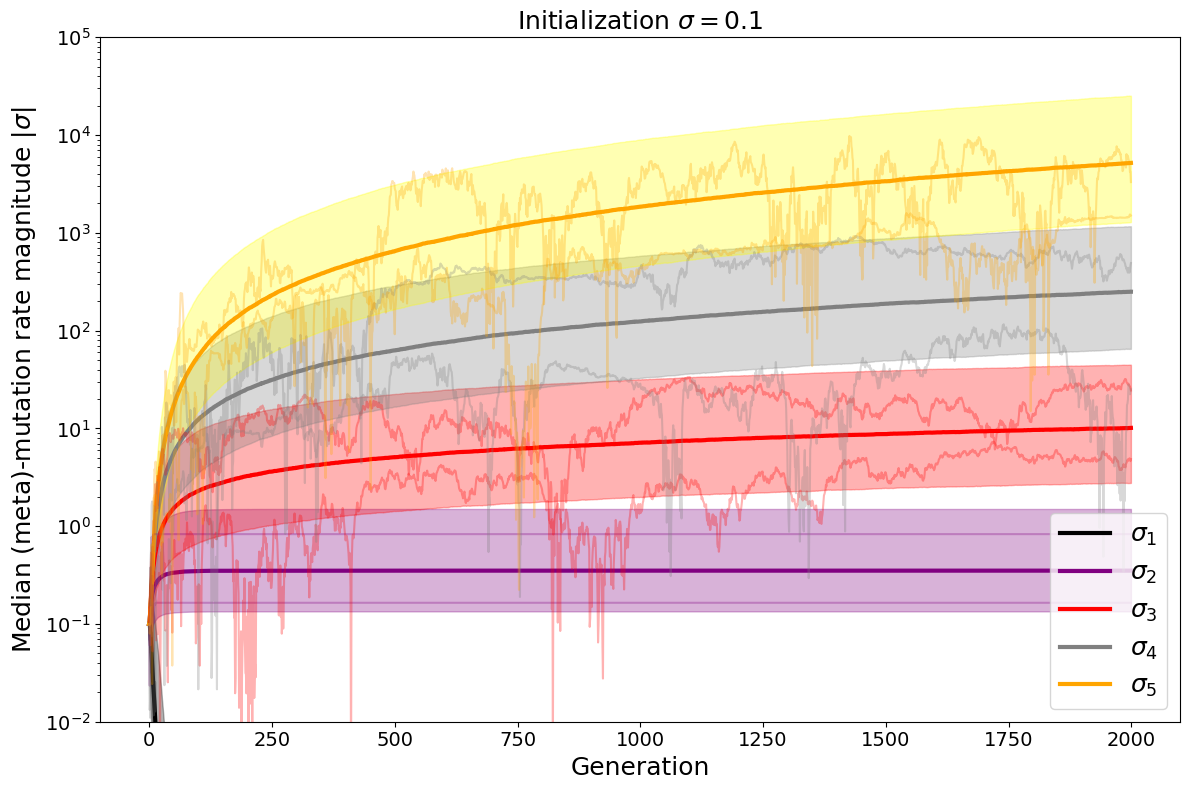

In [50]:
# Create subplots with 2 rows and 1 column
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# First plot (top subplot)
ax1.set_yscale('log')
ax1.set_ylim([1e-2, 1e+5])
ax1.plot(sigmas_medians_5, label=r'$\sigma_1$', linewidth = 3, color = "black")
ax1.fill_between(
    range(len(sigmas_medians_5)),
    sigmas_5_perc2,
    sigmas_5_perc3,
    color='black', alpha=0.3
)
ax1.plot(sigmas_medians_4, label=r'$\sigma_2$', linewidth = 3, c="purple")
ax1.fill_between(
    range(len(sigmas_medians_4)),
    sigmas_4_perc2,
    sigmas_4_perc3,
    color='purple', alpha=0.3)
ax1.plot(sigmas_medians_3, label=r'$\sigma_3$', linewidth = 3, c = "red")
ax1.fill_between(
    range(len(sigmas_medians_3)),
    sigmas_3_perc2,
    sigmas_3_perc3,
    color='red', alpha=0.3)
ax1.plot(sigmas_medians_2, label=r'$\sigma_4$', alpha=1, linewidth = 3, c = "gray")
ax1.fill_between(
    range(len(sigmas_medians_2)),
    sigmas_2_perc2,
    sigmas_2_perc3,
    color='gray', alpha=0.3)
ax1.plot(sigmas_medians_1, label=r'$\sigma_5$', alpha=1, linewidth = 3, c = "orange")
ax1.fill_between(
    range(len(sigmas_medians_1)),
    sigmas_1_perc2,
    sigmas_1_perc3,
    color='yellow', alpha=0.3)
ax1.plot(sigmas_history[:,0,70], color="black", alpha=0.3)
ax1.plot(sigmas_history[:,0,78], color="black", alpha = 0.3)
ax1.plot(sigmas_history[:,1,70], color="purple", alpha=0.3)
ax1.plot(sigmas_history[:,1,78], color="purple", alpha = 0.3)
ax1.plot(sigmas_history[:,2,70], color="red", alpha=0.3)
ax1.plot(sigmas_history[:,2,78], color="red", alpha = 0.3)
ax1.plot(sigmas_history[:,3,70], color="gray", alpha=0.3)
ax1.plot(sigmas_history[:,3,78], color="gray", alpha = 0.3)
ax1.plot(sigmas_history[:,4,70], color="orange", alpha=0.3)
ax1.plot(sigmas_history[:,4,78], color="orange", alpha = 0.3)
#ax1.axhline(y=0.1, c = "black", linestyle='--', linewidth=1, label=r'.1')
ax1.set_xlabel("Generation", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_ylabel("Median (meta)-mutation rate magnitude |$\sigma$|", fontsize=18)
ax1.set_title("Initialization $\sigma = 0.1$", fontsize=18)
ax1.legend(loc=4, fontsize=18)
'''
ax2.set_yscale('log')
ax2.set_ylim([1e-5, 1e+10])
ax2.plot(vmetasigma1s_v1_medians, label=r'$\sigma_5$', linewidth = 1)
ax2.fill_between(
    range(len(metasigma1s_v1_medians)),
    vmetasigma1s_v1_perc1,
    vmetasigma1s_v1_perc2,
    color='blue', alpha=0.3)
ax2.plot(vmetasigma2s_v1_medians, label=r'$\sigma_4$', linewidth = 1, c="purple")
ax2.fill_between(
    range(len(metasigma2s_v1_medians)),
    vmetasigma2s_v1_perc1,
    vmetasigma2s_v1_perc2,
    color='purple', alpha=0.3)
ax2.plot(vmetasigma3s_v1_medians, label=r'$\sigma_3$')
ax2.fill_between(
    range(len(vmetasigma3s_v1_medians)),
    vmetasigma3s_v1_perc1,
    vmetasigma3s_v1_perc2,
    color='red', alpha=0.3)
ax2.plot(vmetasigma4s_v1_medians, label=r'$\sigma_2$', alpha=0.6)
ax2.fill_between(
    range(len(vmetasigma4s_v1_medians)),
    vmetasigma4s_v1_perc1,
    vmetasigma4s_v1_perc2,
    color='gray', alpha=0.3)
ax2.plot(vmetasigma5s_v1_medians, label=r'$\sigma_1$', alpha=0.6)
ax2.fill_between(
    range(len(vmetasigma5s_v1_medians)),
    vmetasigma5s_v1_perc1,
    vmetasigma5s_v1_perc2,
    color='yellow', alpha=0.3)
#ax2.plot(metasigma5s_v2_medians**2, label=r'$\sigma_1^2$', alpha=0.6)
#ax2.plot(metasigma6s_v2_medians**2, label=r'$\sigma_1^2$', alpha=0.2)
#ax2.axhline(y=0.25, c = "black",  linestyle='--', linewidth=1, label=r'0.25')
ax2.set_xlabel("Generation", fontsize=14)
ax2.set_ylabel("Median mutation rate $\sigma$", fontsize=14)
ax2.set_title("Initialization $\sigma = 0.5$", fontsize=14)

ax2.set_ylim([1e-2, 1e+5])
ax2.legend(loc=4)

#ax3.set_yscale('log')
#ax3.plot(metasigma1s_v3_medians**2, label=r'$\sigma_4^2$', linewidth = 2)
#ax3.plot(metasigma2s_v3_medians**2, label=r'$\sigma_3^2$', linewidth = 2, c="purple")
#ax3.plot(metasigma3s_v3_medians**2, label=r'$\sigma_2^2$')
#ax3.plot(metasigma4s_v3_medians**2, label=r'$\sigma_1^2$', alpha=0.6)
#ax3.plot(metasigma5s_v3_medians**2, label=r'$\sigma_1^2$', alpha=0.6)
#ax3.plot(metasigma6s_v3_medians**2, label=r'$\sigma_1^2$', alpha=0.2)
#ax3.axhline(y=0.25, color='r', linestyle='--', linewidth=1, label=r'0.25')
#ax3.set_xlabel("Generation", fontsize=14)
#ax3.set_ylabel("Median squared mutation rate $\sigma^2$", fontsize=14)
#ax3.set_title("$\sigma_{meta} = 0.5$", fontsize=14)
#ax3.legend(loc=2)

#ax4.set_yscale('log')
#ax4.plot(metasigma1s_v4_medians**2, label=r'$\sigma_5^2$')
#ax4.plot(metasigma2s_v4_medians**2, label=r'$\sigma_4^2$', linewidth = 2)
#ax4.plot(metasigma3s_v4_medians**2, label=r'$\sigma_3^2$')
#ax4.plot(metasigma4s_v4_medians**2, label=r'$\sigma_2^2$', alpha=0.6, color="purple")
#ax4.plot(metasigma5s_v4_medians**2, label=r'$\sigma_1^2$', alpha=0.6)
#ax4.plot(metasigma6s_v4_medians**2, label=r'$\sigma_1^2$', alpha=0.2)
#ax4.axhline(y=1.0, color='r', linestyle='--', linewidth=1, label=r'1.00')
#ax4.set_xlabel("Generation", fontsize=14)
#ax4.set_ylabel("Median squared mutation rate $\sigma^2$", fontsize=14)
#ax4.set_title("$\sigma_{meta} = 1.0$", fontsize=14)
#ax4.legend(loc=2)
'''
# Adjust layout to prevent overlap
plt.tight_layout()

# Uncomment the following line if you want to save the figure
#plt.savefig("graf_mutation_rates1.pdf")

# Show the plots
plt.show()


NameError: name 'metasigma1s' is not defined

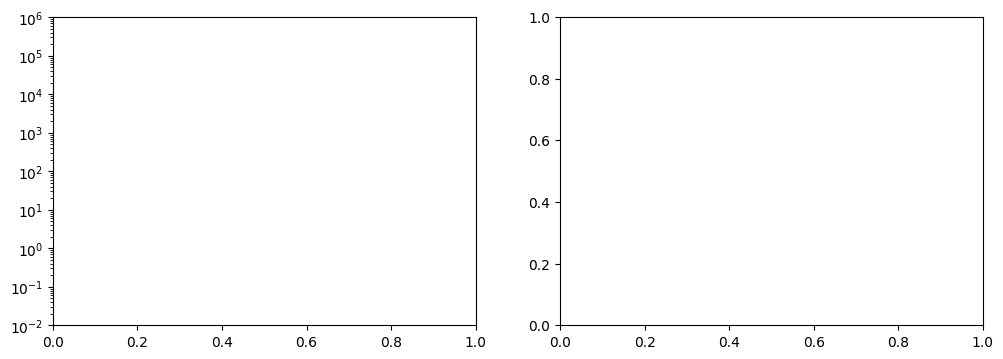

In [155]:
fig, [ax3, ax4] = plt.subplots(1, 2, figsize=(12, 4))

# Plot the lines on the specified axis
ax3.set_yscale('log')
ax3.set_ylim([1e-2, 1e+6])
ax3.plot(metasigma1s[13,:,13], label=r'$\sigma_5^2$', linewidth = 2, color = "black")
ax3.plot(metasigma2s[13,:,13], label=r'$\sigma_4^2$')
ax3.plot(metasigma3s[13,:,13], label=r'$\sigma_3^2$')
ax3.plot(metasigma4s[13,:,13], label=r'$\sigma_2^2$')
ax3.plot(metasigma5s[13,:,13], label=r'$\sigma_1^2$')
ax3.set_xlabel("Generation", fontsize=14)
ax3.set_ylabel("Mutation rate $\sigma$", fontsize=14)
ax3.set_title("Initialization $\sigma = 0.1$", fontsize=14)
ax3.legend(loc=2)

ax4.set_yscale('log')
ax4.set_ylim([1e-2, 1e+6])
ax4.plot(vmetasigma1s[73,:,7], label=r'$\sigma_5^2$', linewidth = 2, color = "black")
ax4.plot(vmetasigma2s[73,:,7], label=r'$\sigma_4^2$')
ax4.plot(vmetasigma3s[73,:,7], label=r'$\sigma_3^2$')
ax4.plot(vmetasigma4s[73,:,7], label=r'$\sigma_2^2$')
ax4.plot(vmetasigma5s[73,:,13], label=r'$\sigma_1^2$')
ax4.set_xlabel("Generation", fontsize=14)
ax4.set_ylabel("Mutation rate $\sigma$", fontsize=14)
ax4.set_title("Initialization $\sigma = 0.5$", fontsize=14)
ax4.legend(loc=4)

plt.tight_layout()

# Uncomment the following line if you want to save the figure
plt.savefig("graf_mutation_rates_combined_extra.pdf")

In [68]:
sum(abs(metasigma2s[:,200,:].flatten())<0.01)

9976

In [76]:
np.percentile(metasigma2s[:,2000,:],[25,75])

array([0.11431626, 1.48919135])

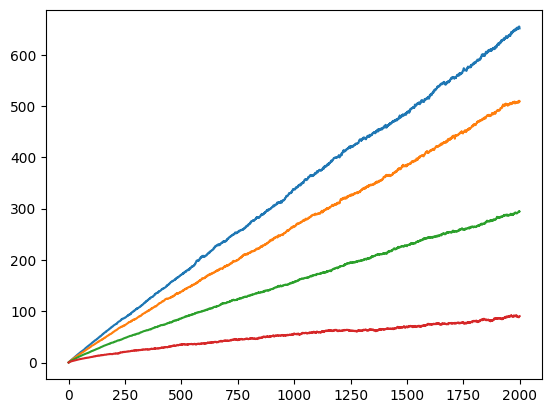

In [7]:
plt.plot(metasigma4s_v1_perc2)
plt.plot(metasigma3s_v1_perc2)
plt.plot(metasigma2s_v1_perc2)
plt.plot(metasigma1s_v1_perc2)

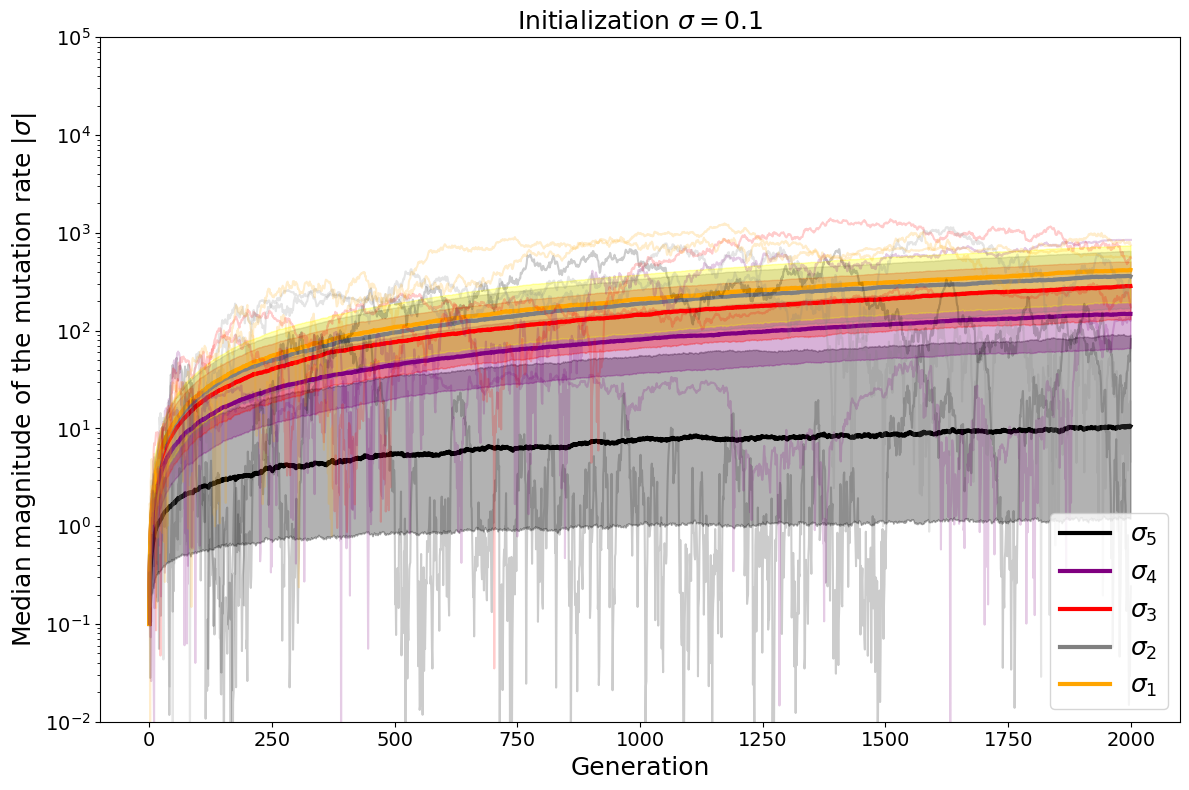

In [10]:
# Create subplots with 2 rows and 1 column
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# First plot (top subplot)
ax1.set_yscale('log')
ax1.set_ylim([1e-2, 1e+5])
ax1.plot(metasigma1s_v1_medians, label=r'$\sigma_5$', linewidth = 3, color = "black")
ax1.fill_between(
    range(len(metasigma1s_v1_medians)),
    metasigma1s_v1_perc1,
    metasigma1s_v1_perc2,
    color='black', alpha=0.3
)
ax1.plot(metasigma2s_v1_medians, label=r'$\sigma_4$', linewidth = 3, c="purple")
ax1.fill_between(
    range(len(metasigma2s_v1_medians)),
    metasigma2s_v1_perc1,
    metasigma2s_v1_perc2,
    color='purple', alpha=0.3)
ax1.plot(metasigma3s_v1_medians, label=r'$\sigma_3$', linewidth = 3, c = "red")
ax1.fill_between(
    range(len(metasigma3s_v1_medians)),
    metasigma3s_v1_perc1,
    metasigma3s_v1_perc2,
    color='red', alpha=0.3)
ax1.plot(metasigma4s_v1_medians, label=r'$\sigma_2$', alpha=1, linewidth = 3, c = "gray")
ax1.fill_between(
    range(len(metasigma4s_v1_medians)),
    metasigma4s_v1_perc1,
    metasigma4s_v1_perc2,
    color='gray', alpha=0.3)
ax1.plot(metasigma5s_v1_medians, label=r'$\sigma_1$', alpha=1, linewidth = 3, c = "orange")
ax1.fill_between(
    range(len(metasigma5s_v1_medians)),
    metasigma5s_v1_perc1,
    metasigma5s_v1_perc2,
    color='yellow', alpha=0.3)
ax1.plot(metasigma1s[13,:,13], color="black", alpha=0.2)
ax1.plot(metasigma1s[29,:,29], color="black", alpha = 0.2)
ax1.plot(metasigma2s[13,:,13], color="purple", alpha=0.2)
ax1.plot(metasigma2s[29,:,29], color="purple", alpha = 0.2)
ax1.plot(metasigma3s[13,:,13], color="red", alpha=0.2)
ax1.plot(metasigma3s[29,:,29], color="red", alpha = 0.2)
ax1.plot(metasigma4s[13,:,13], color="gray", alpha=0.2)
ax1.plot(metasigma4s[29,:,29], color="gray", alpha = 0.2)
ax1.plot(metasigma5s[13,:,13], color="orange", alpha=0.2)
ax1.plot(metasigma5s[29,:,29], color="orange", alpha = 0.2)
#ax1.axhline(y=0.1, c = "black", linestyle='--', linewidth=1, label=r'.1')
ax1.set_xlabel("Generation", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_ylabel("Median magnitude of the mutation rate |$\sigma$|", fontsize=18)
ax1.set_title("Initialization $\sigma = 0.1$", fontsize=18)
ax1.legend(loc=4, fontsize=18)
'''
ax2.set_yscale('log')
ax2.set_ylim([1e-5, 1e+10])
ax2.plot(vmetasigma1s_v1_medians, label=r'$\sigma_5$', linewidth = 1)
ax2.fill_between(
    range(len(metasigma1s_v1_medians)),
    vmetasigma1s_v1_perc1,
    vmetasigma1s_v1_perc2,
    color='blue', alpha=0.3)
ax2.plot(vmetasigma2s_v1_medians, label=r'$\sigma_4$', linewidth = 1, c="purple")
ax2.fill_between(
    range(len(metasigma2s_v1_medians)),
    vmetasigma2s_v1_perc1,
    vmetasigma2s_v1_perc2,
    color='purple', alpha=0.3)
ax2.plot(vmetasigma3s_v1_medians, label=r'$\sigma_3$')
ax2.fill_between(
    range(len(vmetasigma3s_v1_medians)),
    vmetasigma3s_v1_perc1,
    vmetasigma3s_v1_perc2,
    color='red', alpha=0.3)
ax2.plot(vmetasigma4s_v1_medians, label=r'$\sigma_2$', alpha=0.6)
ax2.fill_between(
    range(len(vmetasigma4s_v1_medians)),
    vmetasigma4s_v1_perc1,
    vmetasigma4s_v1_perc2,
    color='gray', alpha=0.3)
ax2.plot(vmetasigma5s_v1_medians, label=r'$\sigma_1$', alpha=0.6)
ax2.fill_between(
    range(len(vmetasigma5s_v1_medians)),
    vmetasigma5s_v1_perc1,
    vmetasigma5s_v1_perc2,
    color='yellow', alpha=0.3)
#ax2.plot(metasigma5s_v2_medians**2, label=r'$\sigma_1^2$', alpha=0.6)
#ax2.plot(metasigma6s_v2_medians**2, label=r'$\sigma_1^2$', alpha=0.2)
#ax2.axhline(y=0.25, c = "black",  linestyle='--', linewidth=1, label=r'0.25')
ax2.set_xlabel("Generation", fontsize=14)
ax2.set_ylabel("Median mutation rate $\sigma$", fontsize=14)
ax2.set_title("Initialization $\sigma = 0.5$", fontsize=14)

ax2.set_ylim([1e-2, 1e+5])
ax2.legend(loc=4)

#ax3.set_yscale('log')
#ax3.plot(metasigma1s_v3_medians**2, label=r'$\sigma_4^2$', linewidth = 2)
#ax3.plot(metasigma2s_v3_medians**2, label=r'$\sigma_3^2$', linewidth = 2, c="purple")
#ax3.plot(metasigma3s_v3_medians**2, label=r'$\sigma_2^2$')
#ax3.plot(metasigma4s_v3_medians**2, label=r'$\sigma_1^2$', alpha=0.6)
#ax3.plot(metasigma5s_v3_medians**2, label=r'$\sigma_1^2$', alpha=0.6)
#ax3.plot(metasigma6s_v3_medians**2, label=r'$\sigma_1^2$', alpha=0.2)
#ax3.axhline(y=0.25, color='r', linestyle='--', linewidth=1, label=r'0.25')
#ax3.set_xlabel("Generation", fontsize=14)
#ax3.set_ylabel("Median squared mutation rate $\sigma^2$", fontsize=14)
#ax3.set_title("$\sigma_{meta} = 0.5$", fontsize=14)
#ax3.legend(loc=2)

#ax4.set_yscale('log')
#ax4.plot(metasigma1s_v4_medians**2, label=r'$\sigma_5^2$')
#ax4.plot(metasigma2s_v4_medians**2, label=r'$\sigma_4^2$', linewidth = 2)
#ax4.plot(metasigma3s_v4_medians**2, label=r'$\sigma_3^2$')
#ax4.plot(metasigma4s_v4_medians**2, label=r'$\sigma_2^2$', alpha=0.6, color="purple")
#ax4.plot(metasigma5s_v4_medians**2, label=r'$\sigma_1^2$', alpha=0.6)
#ax4.plot(metasigma6s_v4_medians**2, label=r'$\sigma_1^2$', alpha=0.2)
#ax4.axhline(y=1.0, color='r', linestyle='--', linewidth=1, label=r'1.00')
#ax4.set_xlabel("Generation", fontsize=14)
#ax4.set_ylabel("Median squared mutation rate $\sigma^2$", fontsize=14)
#ax4.set_title("$\sigma_{meta} = 1.0$", fontsize=14)
#ax4.legend(loc=2)
'''
# Adjust layout to prevent overlap
plt.tight_layout()

# Uncomment the following line if you want to save the figure
plt.savefig("graf_mutation_rates_combined_spec.pdf")

# Show the plots
plt.show()


In [1]:
metasigma2s_v1_medians

NameError: name 'metasigma2s_v1_medians' is not defined

In [55]:
import pandas as pd
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

TEST_NAMES = ['White', 'Breusch-Pagan', 'Goldfeld-Quandt']
FORMULA = 'value ~ time'


class Heteroskedasticity:

    @staticmethod
    def het_tests(series: pd.Series, test: str) -> float:
        """
        Testing for heteroskedasticity
        :param series: Univariate time series as pd.Series
        :param test: String denoting the test. One of 'white','goldfeldquandt', or 'breuschpagan'
        :return: p-value as a float.
        If the p-value is high, we accept the null hypothesis that the data is homoskedastic
        """
        assert test in TEST_NAMES, 'Unknown test'

        series = series.reset_index(drop=True).reset_index()
        series.columns = ['time', 'value']
        series['time'] += 1

        olsr = ols(FORMULA, series).fit()

        if test == 'White':
            _, p_value, _, _ = sms.het_white(olsr.resid, olsr.model.exog)
        elif test == 'Goldfeld-Quandt':
            _, p_value, _ = sms.het_goldfeldquandt(olsr.resid, olsr.model.exog, alternative='two-sided')
        else:
            _, p_value, _, _ = sms.het_breuschpagan(olsr.resid, olsr.model.exog)

        return p_value

    @classmethod
    def run_all_tests(cls, series: pd.Series):

        test_results = {k: cls.het_tests(series, k) for k in TEST_NAMES}

        return test_results

In [92]:
import pandas as pd
test_results = Heteroskedasticity.run_all_tests(pd.DataFrame(metasigma3s_v2_medians**2))
print(test_results)

{'White': 2.93849454506496e-118, 'Breusch-Pagan': 0.1109588375076064, 'Goldfeld-Quandt': 2.3268710337460156e-05}


In [41]:
print(np.mean(metasigma5s_v1_medians**2))
print(np.std(metasigma5s_v1_medians**2))
print(np.mean(metasigma5s_v2_medians**2))
print(np.std(metasigma5s_v2_medians**2))
print(np.mean(metasigma5s_v3_medians**2))
print(np.std(metasigma5s_v3_medians**2))
print(np.mean(metasigma5s_v4_medians**2))
print(np.std(metasigma5s_v4_medians**2))

2.542100624343446
8.4353413078315
2132.44555624684
9187.483490839555
4360817.9591891095
17071999.06465298
2737542899121.1826
13616215138781.732


In [ ]:
from statsmodels.tsa.stattools import adfuller #1_v4, 3_v2

#perform augmented Dickey-Fuller test
adfuller(metasigma5s_04_medians[0:10000]**2)

In [ ]:
import numpy as np
from scipy.stats import levene
import matplotlib.pyplot as plt

# Generate a sample time series with changing variance
np.random.seed(42)
n = 100
time_series = np.concatenate([
    np.random.normal(loc=0, scale=1, size=n//4),  # Segment 1: variance 1
    np.random.normal(loc=0, scale=2, size=n//4),  # Segment 2: variance 4
    np.random.normal(loc=0, scale=3, size=n//4),  # Segment 3: variance 9
    np.random.normal(loc=0, scale=1.5, size=n//4)  # Segment 4: variance 2.25
])

# Split time series into segments
segments = np.array_split(time_series, 4)

# Apply Levene's test to check for equal variance across segments
stat, p_value = levene(metasigma2s_04_medians_alt_alt[0:2500]**2, metasigma2s_04_medians_alt_alt[2500:5000]**2, metasigma2s_04_medians_alt_alt[5000:7500]**2, metasigma2s_04_medians_alt_alt[7500:10000]**2)

# Print the results
print(f'Levene\'s test statistic: {stat}')
print(f'P-value: {p_value}') #metasigma2s_04_medians_alt_alt[0:5000]**2

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("The variances are significantly different across segments.")
else:
    print("There is no significant difference in variances across segments.")

In [ ]:
metasigma5s_04_medians_alt_alt**2

In [ ]:
#print(np.mean(metasigma4s_04_medians_alt[2500:3000]**2))
print(np.mean(metasigma2s_04_medians_alt_alt[0:500]**2))
print(np.mean(metasigma2s_04_medians_alt_alt[500:1000]**2))
print(np.mean(metasigma2s_04_medians_alt_alt[1500:2000]**2))
print(np.mean(metasigma2s_04_medians_alt_alt[2500:3000]**2))
print(np.mean(metasigma2s_04_medians_alt_alt[3000:3500]**2))
print(np.mean(metasigma2s_04_medians_alt_alt[3500:4000]**2))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def process():
    sigma1 = 1.3
    sigma2 = 0
    sigma3 = 0
    sigma2s = []
    #sigma1s.append(sigma1)
    try:
        for i in range(100000):
            sigma1 += np.random.normal(0, sigma1**2)
            sigma2 += np.random.normal(0, sigma1**2)
            #sigma3 += np.random.normal(0, sigma2**2)
            sigma2s.append(sigma2)
    except OverflowError:
        return "kk"
    return sigma2s[-1]

In [ ]:
reza = [process() for i in range(1000)]

In [ ]:
plt.hist([i for i in reza if type(i) is not str], bins=30)

In [ ]:
plt.plot(sigma3s)

In [94]:
metasigma1s_v3_medians**2

array([2.50000000e-01, 2.50651646e-01, 1.57461650e-01, ...,
       2.79006411e-05, 2.77498948e-05, 2.77580713e-05])